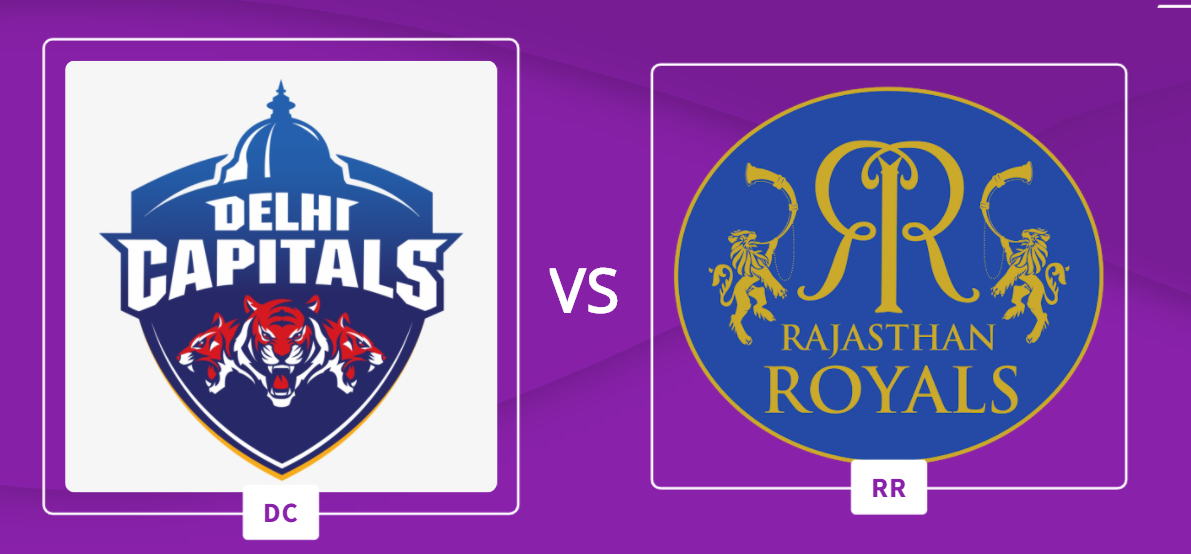

In [354]:
import operator
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', 50)

In [355]:
matches = pd.read_csv("matches.csv")
deliveries =  pd.read_csv("deliveries.csv")

In [356]:
IPL_data = pd.merge(deliveries, matches[['id','season', 'team1', 'team2', 'toss_winner', 'toss_decision','winner','result', 'dl_applied','win_by_runs','win_by_wickets', 'venue' ]], 
                    left_on='match_id', right_on='id')



In [357]:
IPL_data.player_dismissed.fillna(0, inplace=True)
IPL_data['player_dismissed'].loc[IPL_data['player_dismissed'] != 0] = 1
IPL_data_bowler['player_dismissed'].loc[IPL_data['player_dismissed'] != 'run out'] = 0 #not counted in wickets of a bowler
IPL_data_bowler['player_dismissed'].loc[IPL_data['player_dismissed'] != 0] = 1

## Powerplay Analysis

## Strike Rate of batsmen in IPL all overs

In [482]:
batting_ings_g = IPL_data.groupby(['match_id','batsman']).apply(lambda x:np.sum(x['batsman_runs'])).reset_index(name='Innings Runs')

batsman_ball_faced_g = IPL_data.groupby(['match_id','batsman']).apply(lambda x:x['batsman_runs'].count()).reset_index(name='Balls Faced')
batsmen_performance_g = pd.merge(batting_ings_g,batsman_ball_faced_g,how='inner',left_on=['match_id','batsman'],right_on=['match_id','batsman'])
batsmen_performance_g['Strike Rate for Match']=batsmen_performance_g['Innings Runs']*100/batsmen_performance_g['Balls Faced']
batsmen_performance_g

match_id      batsman  Innings Runs  Balls Faced  Strike Rate for Match
0             1  A Choudhary             6            2             300.000000
1             1  BCJ Cutting            16            6             266.666667
2             1     CH Gayle            32           23             139.130435
3             1    DA Warner            14            9             155.555556
4             1     DJ Hooda            16           12             133.333333
...         ...          ...           ...          ...                    ...
11289     11415    RD Chahar             0            2               0.000000
11290     11415    RG Sharma            15           14             107.142857
11291     11415     SK Raina             9           15              60.000000
11292     11415    SN Thakur             2            2             100.000000
11293     11415    SR Watson            84           62             135.483871

[11294 rows x 5 columns]

##  Strike Rate of batsmen in Power Play

In [481]:
IPL_data_PP = IPL_data[IPL_data.over <= 6]
batting_ings = IPL_data_PP.groupby(['match_id','batsman']).apply(lambda x:np.sum(x['batsman_runs'])).reset_index(name='Innings Runs')

batsman_ball_faced = IPL_data_PP.groupby(['match_id','batsman']).apply(lambda x:x['batsman_runs'].count()).reset_index(name='Balls Faced')
batsmen_performance = pd.merge(batting_ings,batsman_ball_faced,how='inner',left_on=['match_id','batsman'],right_on=['match_id','batsman'])
batsmen_performance['Strike Rate for Match']=batsmen_performance['Innings Runs']*100/batsmen_performance['Balls Faced']
batsmen_performance

match_id        batsman  Innings Runs  Balls Faced  \
0            1       CH Gayle            26           20   
1            1      DA Warner            14            9   
2            1   MC Henriques            17           13   
3            1  Mandeep Singh            24           16   
4            1       S Dhawan            24           16   
...        ...            ...           ...          ...   
5079     11415   Ishan Kishan             0            4   
5080     11415      Q de Kock            30           18   
5081     11415      RG Sharma            15           14   
5082     11415       SK Raina             3            4   
5083     11415      SR Watson            24           20   

      Strike Rate for Match  
0                130.000000  
1                155.555556  
2                130.769231  
3                150.000000  
4                150.000000  
...                     ...  
5079               0.000000  
5080             166.666667  
5081             107.142857  
5082              75.000000  
5083             120.000000  

[5084 rows x 5 columns]

## Bowling Economy Rates of Players in IPL all overs

In [483]:
bowling_runs=IPL_data.groupby('bowler').apply(lambda x:np.sum(x['total_runs'])).reset_index(name='Runs Conceeded')
bowling_balls=IPL_data.groupby('bowler').count()
bowled_balls=bowling_balls['ball'].reset_index(name='Balls Bowled')
bowler_stats=pd.merge(bowling_runs,bowled_balls,left_on='bowler',right_on='bowler',how='outer')


bowler_economy_rate=bowler_stats.groupby(['bowler','Balls Bowled']).apply(lambda x:(((x['Runs Conceeded'])/(x['Balls Bowled']))*6)).reset_index(name='Economy Rate')
bowler_economy_rate

bowler  Balls Bowled  level_2  Economy Rate
0    A Ashish Reddy           270        0      8.888889
1        A Chandila           234        1      6.282051
2       A Choudhary           108        2      8.000000
3       A Dananjaya            25        3     11.520000
4        A Flintoff            66        4      9.636364
..              ...           ...      ...           ...
400      YA Abdulla           222      400      8.405405
401       YK Pathan          1184      401      7.312500
402       YS Chahal          1841      402      7.873982
403    Yuvraj Singh           882      403      7.428571
404          Z Khan          2276      404      7.539543

[405 rows x 4 columns]

## Bowling Economy rates of Bowlers in Power play

In [485]:
bowling_runs_PP = IPL_data_PP.groupby('bowler').apply(lambda x:np.sum(x['total_runs'])).reset_index(name='Runs Conceeded')
bowling_balls_PP = IPL_data_PP.groupby('bowler').count()
bowled_balls_PP = bowling_balls_PP['ball'].reset_index(name='Balls Bowled')
bowler_stats_PP = pd.merge(bowling_runs_PP,bowled_balls_PP,left_on='bowler',right_on='bowler',how='outer')


bowler_economy_rate_PP=bowler_stats_PP.groupby(['bowler','Balls Bowled']).apply(lambda x:(((x['Runs Conceeded'])/(x['Balls Bowled']))*6)).reset_index(name='Economy Rate')
bowler_economy_rate_PP

bowler  Balls Bowled  level_2  Economy Rate
0     A Ashish Reddy             6        0     20.000000
1         A Chandila           144        1      5.791667
2        A Choudhary            37        2      7.459459
3        A Dananjaya             6        3     12.000000
4         A Flintoff            12        4     10.500000
..               ...           ...      ...           ...
327  Y Venugopal Rao            42      327      9.571429
328       YA Abdulla            89      328      6.943820
329        YK Pathan           368      329      6.554348
330        YS Chahal           325      330      7.975385
331           Z Khan          1346      331      6.650817

[332 rows x 4 columns]

## Economy rate of Bowlers of RR in Powerplay

In [488]:
# Bowlers of RR
#K Tyagi : 1st IPL
bowler_RR_list = ['J Archer' ,'S Gopal' , 'JD Unadkat', 'BA Stokes']


## Economy Rate of RR Players in Power Play

overs included for power play are:  [1 2 3 4 5 6]


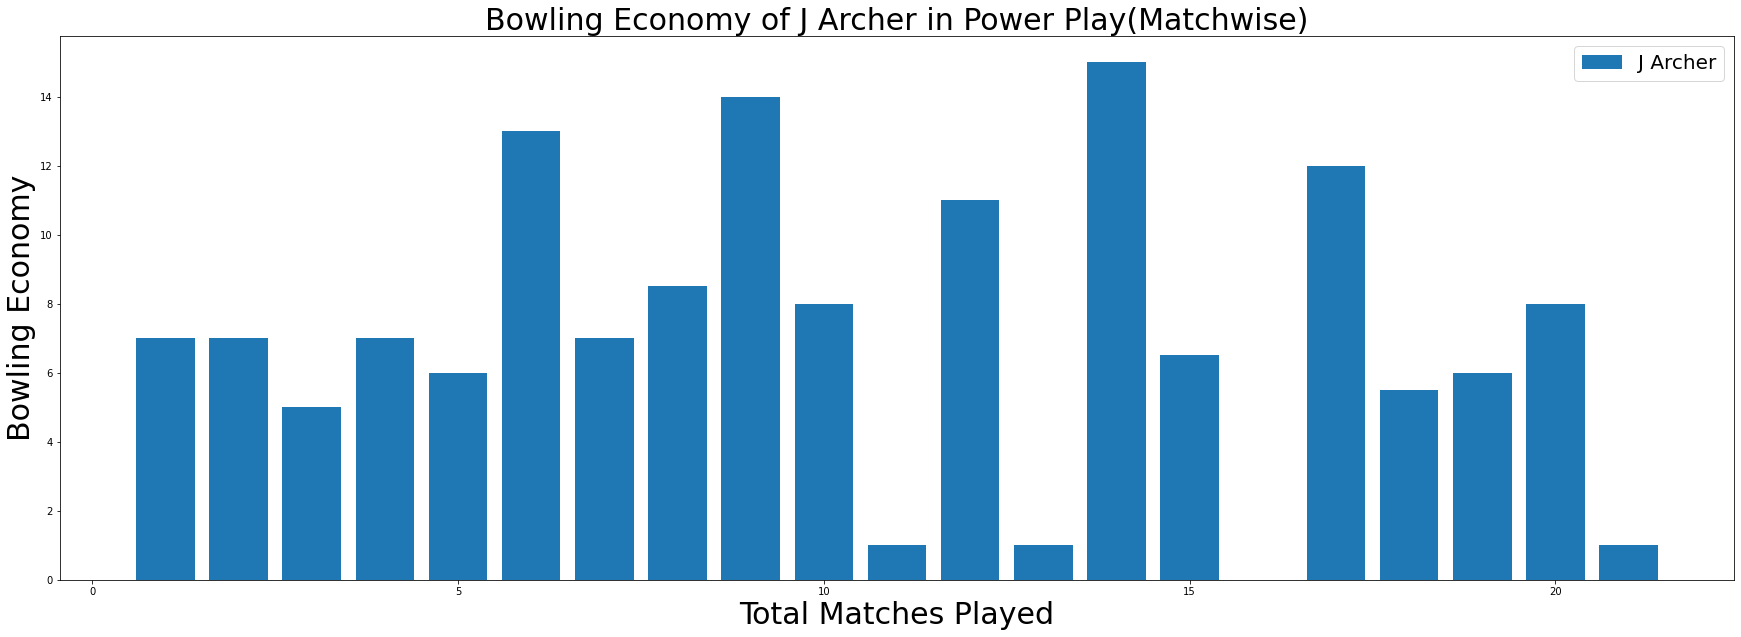

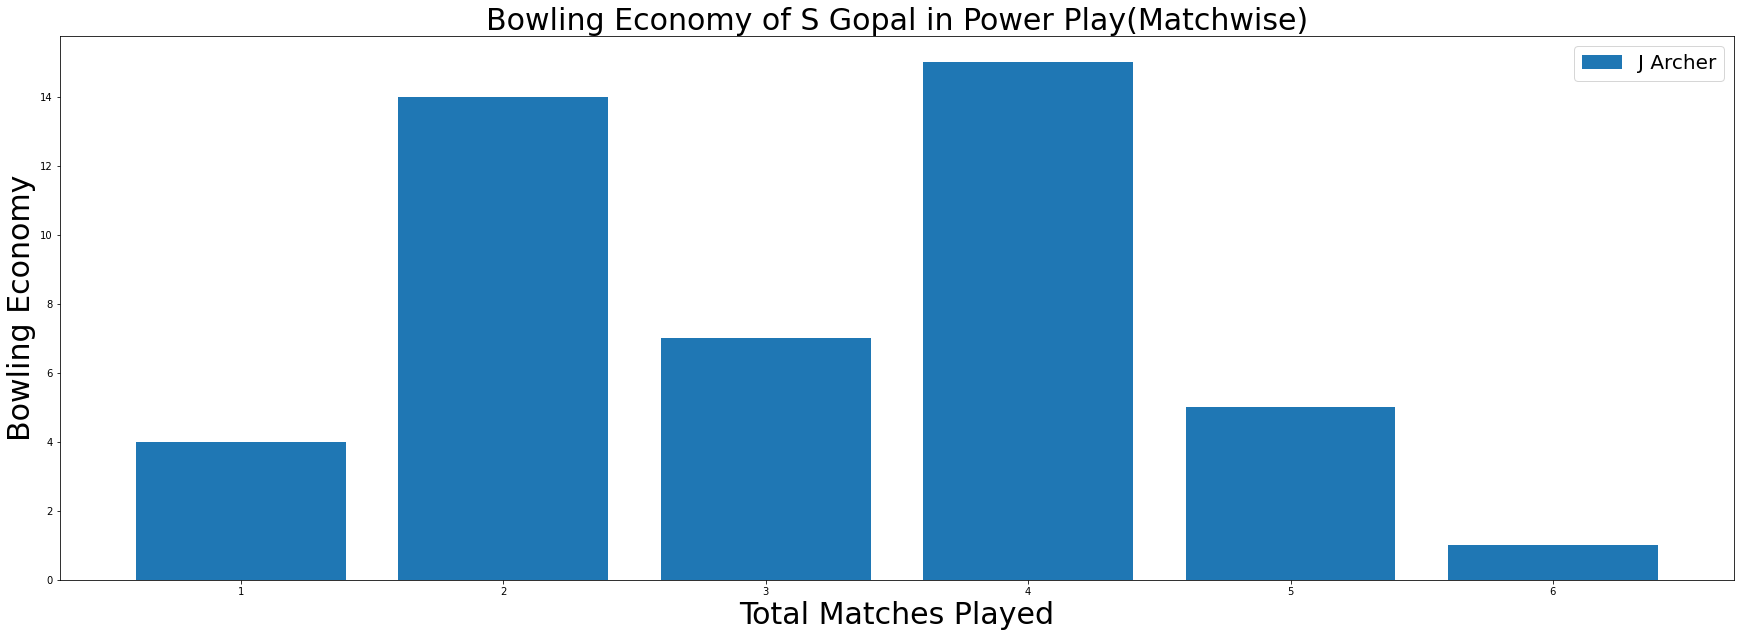

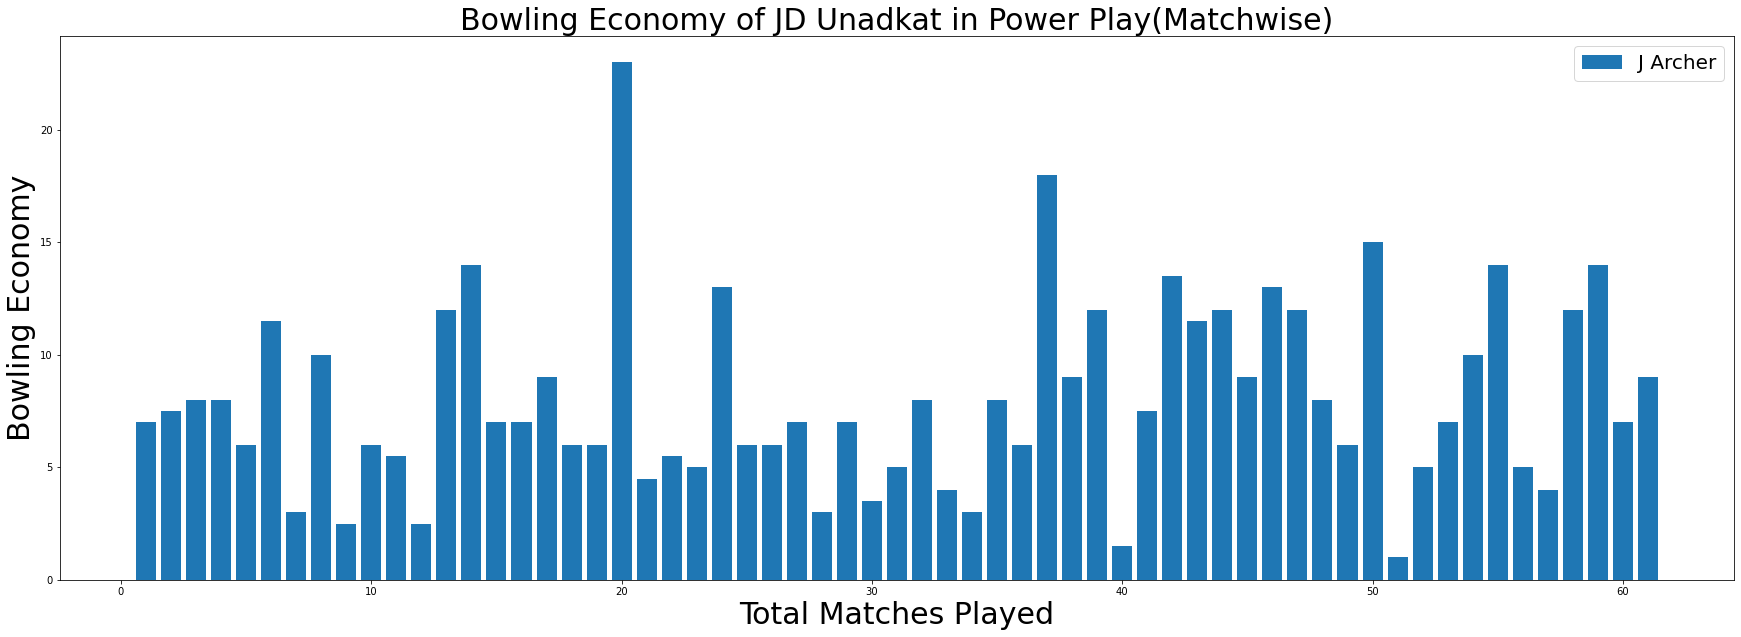

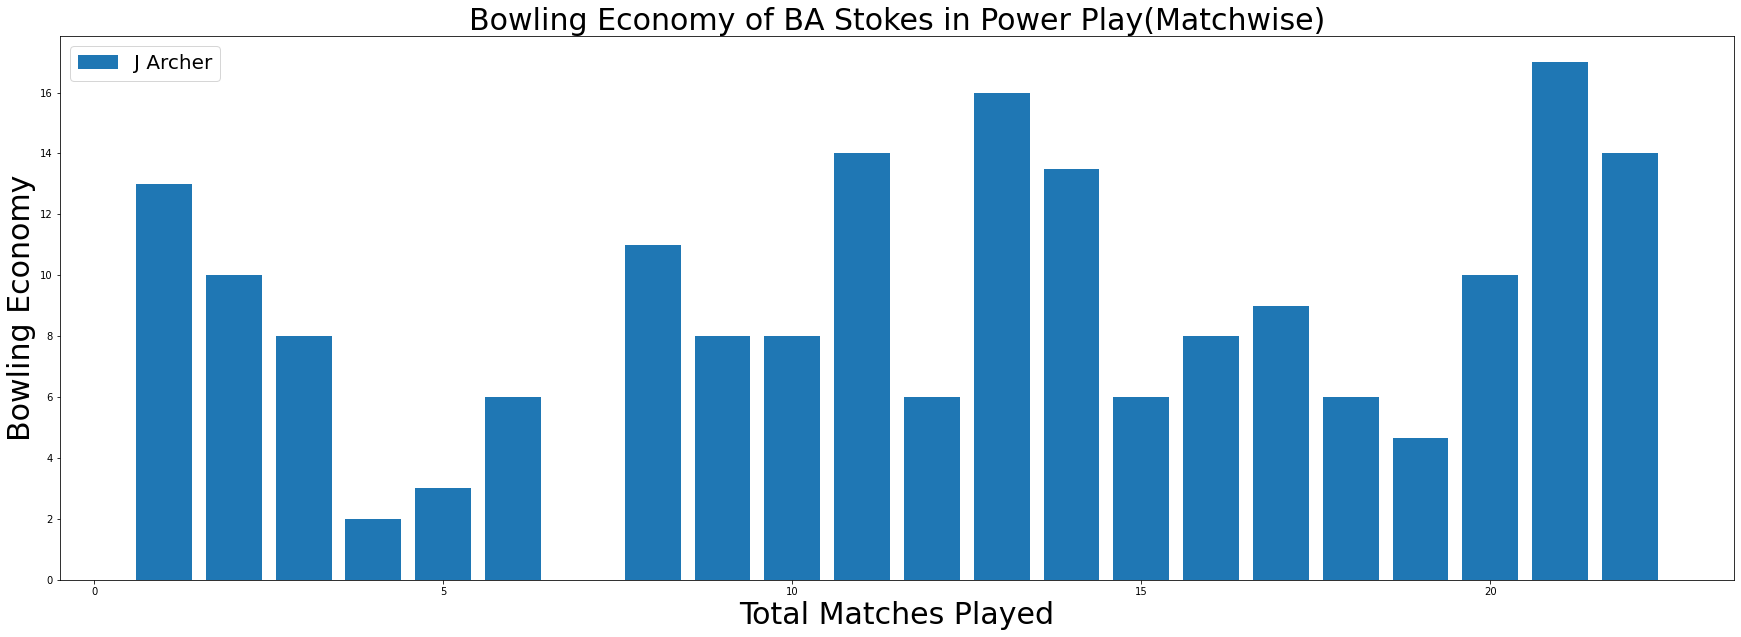

In [501]:
IPL_data_bowler_ = IPL_data.groupby(['match_id', 'inning', 'over','toss_winner', 'toss_decision', 'batting_team','bowling_team','bowler','batsman','winner', 'venue'])[['wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs','batsman_runs', 'extra_runs','total_runs', 'player_dismissed']].agg(['sum']).reset_index()
IPL_data_bowler_.columns = IPL_data_bowler_.columns.get_level_values(0)
# innings score and wickets #
IPL_data_bowler_['innings_wickets'] = IPL_data_bowler_.groupby(['match_id', 'inning'])['player_dismissed'].cumsum()
IPL_data_bowler_['innings_score'] = IPL_data_bowler_.groupby(['match_id', 'inning'])['total_runs'].cumsum()


IPL_Scores_bowler_over  = IPL_data_bowler_.groupby(['match_id','inning','over','bowler'])['wide_runs','bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs','batsman_runs', 'extra_runs','total_runs', 'player_dismissed'].sum().reset_index()
IPL_Scores_bowler_over.head(10)

# Powerplay analysis bowler
powerplay_bowler = IPL_Scores_bowler_over[IPL_Scores_bowler_over.over <=6]
print("overs included for power play are: ",powerplay_bowler.over.unique())
pp_bowler  = powerplay_bowler.groupby(['match_id','inning','bowler'])['over'].count().reset_index()
pp_bowler_  = powerplay_bowler.groupby(['match_id','inning','bowler'])['total_runs', 'player_dismissed'].sum().reset_index()
pp_bowler_['powerplay_over'] = pp_bowler.over.values
pp_bowler_['bowler_economy']  = pp_bowler_.total_runs.values/pp_bowler_.powerplay_over.values

# Calculations for Striking Rate and Bowling Average
Powerp_bowler_BSR = IPL_Scores_bowler_BSR_[IPL_Scores_bowler_BSR_.over <= 6]
Powerp_bowler_BSR_  = Powerp_bowler_BSR.groupby(['match_id','inning','over','ball','bowler'])['total_runs', 'player_dismissed'].sum().reset_index()
temp_bsr_pp  = Powerp_bowler_BSR.groupby(['match_id','inning','over','bowler'])['ball'].count().reset_index()
temp_bsr_pp_ = temp_bsr_pp.groupby(['match_id','inning','bowler'])['ball'].sum().reset_index()
pp_bowler_['ball'] = temp_bsr_pp_.ball.values
pp_bowler_stats = pp_bowler_[['match_id', 'inning', 'bowler', 'total_runs', 'player_dismissed','powerplay_over', 'ball','bowler_economy']]


# Strike rate 
BSR_ = []
for j,i in zip(pp_bowler_stats.ball.values, pp_bowler_.player_dismissed.values):
    if i != 0:
        BSR_.append(j/i)
    else:
        BSR_.append("-")
        
# Bowling Average
Bavg_ = []
for j,i in zip(pp_bowler_stats.total_runs.values, pp_bowler_stats.player_dismissed.values):
    if i != 0:
        Bavg_.append(j/i)
    else:
        Bavg_.append("-")

pp_bowler_stats["Bowling_Strike_Rate"] = BSR_
pp_bowler_stats["Bowling_Average"] = Bavg_
pp_bowler_stats

IPL_bowler_stats_RR_ = pp_bowler_stats[pp_bowler_stats.bowler.isin(bowler_RR_list)]
 

for name in bowler_RR_list:
    plt.figure(figsize=(30,10))
    bowler_check_ = IPL_bowler_stats_RR_[IPL_bowler_stats_RR_.bowler==name]
    bowler_check_.index = np.arange(1, len(bowler_check_) + 1)
    x=bowler_check_.index
    y=bowler_check_.bowler_economy
    plt.bar(x,y)
    
     
    str1 = "Bowling Economy of " + name + "" +" in Power Play(Matchwise)"
    plt.legend(bowler_RR_list,prop={'size':20})
    plt.title(str1 ,fontsize=30)
    plt.xlabel("Total Matches Played",fontsize=30)
    plt.ylabel("Bowling Economy",fontsize=30)
    plt.show()

In [500]:
IPL_bowler_stats_RR = bowler_economy_rate_PP[bowler_economy_rate_PP.bowler.isin(bowler_RR_list)]
for name in bowler_RR_list:
    bowler_check1 = IPL_bowler_stats_RR[IPL_bowler_stats_RR.bowler==name]
    bowler_check1.index = np.arange(1, len(bowler_check1) + 1)
    print("###############################################################################################################################")
    print("\nAverage Bowling Economy Rate of ",name," in powerplay is ",bowler_check1['Economy Rate'].mean(),"\n" )
    print("###############################################################################################################################")


###############################################################################################################################

Average Bowling Economy Rate of  J Archer  in powerplay is  6.707692307692308 

###############################################################################################################################
###############################################################################################################################

Average Bowling Economy Rate of  S Gopal  in powerplay is  8.285714285714285 

###############################################################################################################################
###############################################################################################################################

Average Bowling Economy Rate of  JD Unadkat  in powerplay is  7.56766917293233 

#####################################################################################################################

## Economy rate of probables bowlers bowling in powerplay ranges from 6.7 to 8.39
### Hence the score would be between 41 to 50. But,Striking rate of DC batsmen should also be taken account


## DC Batsmen performance in powerplay
#### Probable DC Batsmen in Power Play


In [475]:
batsmen_DC_list = ['P Shaw', 'S Dhawan',  'AM Rahane', 'SS Iyer','MP Stoinis']
batsmen_performance.columns

Index(['match_id', 'batsman', 'Innings Runs', 'Balls Faced',
       'Strike Rate for Match'],
      dtype='object')

###############################################################################################################################

Average strike Rate of  P Shaw  in powerplay is  126.09992817639875 

###############################################################################################################################
###############################################################################################################################

Average strike Rate of  S Dhawan  in powerplay is  109.17410075193493 

###############################################################################################################################
###############################################################################################################################

Average strike Rate of  AM Rahane  in powerplay is  100.59308912706031 

###############################################################################################################################
##############

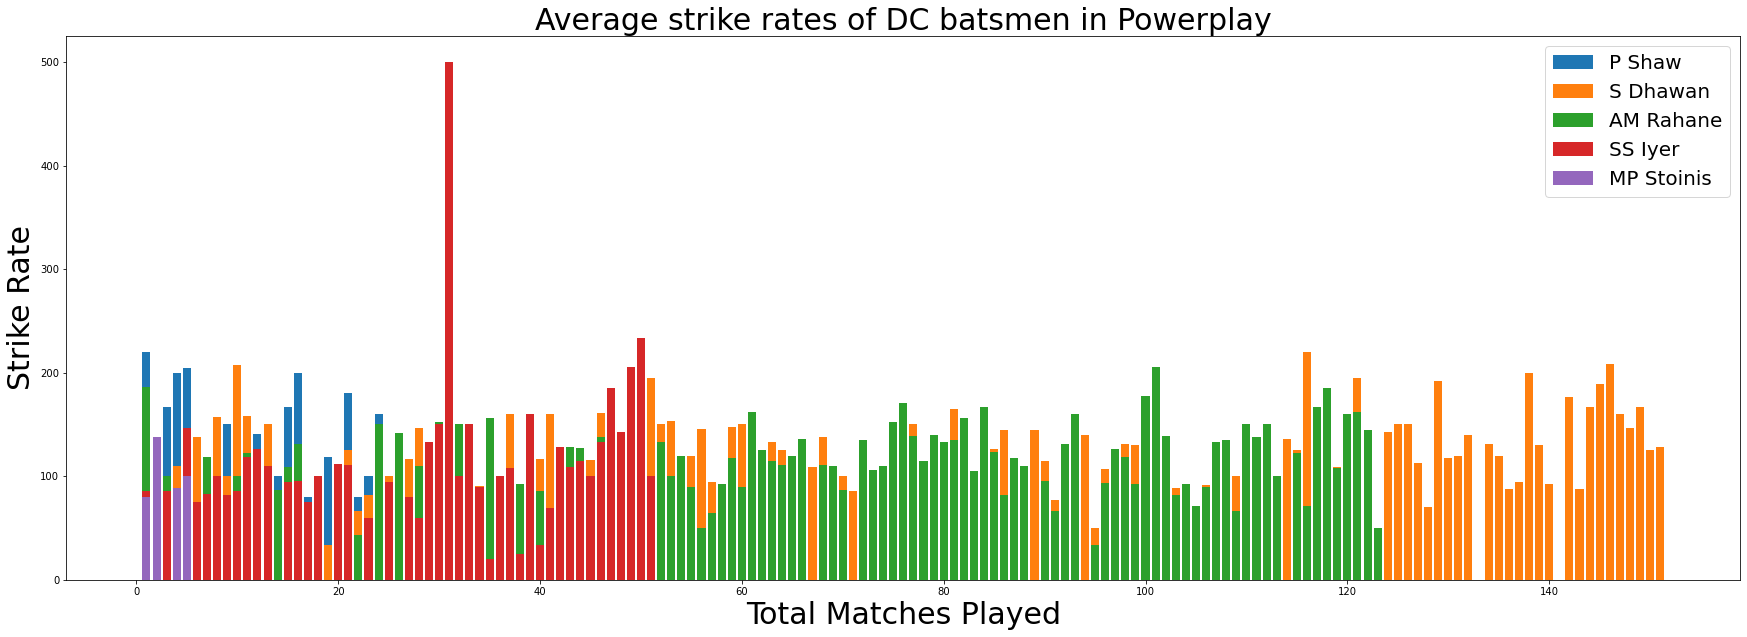

In [479]:
batsman_DC =  batsmen_performance[batsmen_performance.batsman.isin(batsmen_DC_list)]
plt.figure(figsize=(30,10))
for name in batsmen_DC_list:
    bowler_check_dc = batsman_DC[batsman_DC.batsman==name]
    bowler_check_dc.index = np.arange(1, len(bowler_check_dc) + 1)
    print("###############################################################################################################################")
    print("\nAverage strike Rate of ",name," in powerplay is ",bowler_check_dc['Strike Rate for Match'].mean(),"\n" )
    print("###############################################################################################################################")
    x=bowler_check_dc.index
    y=bowler_check_dc['Strike Rate for Match']
    plt.bar(x,y)
    

plt.legend(batsmen_DC_list,prop={'size':20})
plt.title("Average strike rates of DC batsmen in Powerplay" ,fontsize=30)
plt.xlabel("Total Matches Played",fontsize=30)
plt.ylabel("Strike Rate",fontsize=30)
plt.show()

### probable players in powerplay would be Shaw , Dhavan and Rahane


In [499]:
# SR * B/100
avgSR_shaw = (126.09*6)/100
avgSR_dhavan = (109.17*6)/100
avgSR_rahane = (101.553*6)/100

shaw_dhavan = ((avgSR_shaw*6)+(avgSR_dhavan*6))/2
shaw_dhavan_rahane = ((avgSR_shaw*6)+(avgSR_dhavan*6)+(avgSR_rahane*6))/3

print("If Shaw and Dhawan play today in Powerplay Score would be :", shaw_dhavan)
print("If Shaw, Rahane and Dhawan play today in Powerplay Score would be :", shaw_dhavan_rahane)

If Shaw and Dhawan play today in Powerplay Score would be : 42.3468
If Shaw, Rahane and Dhawan play today in Powerplay Score would be : 40.41756


### So this also suggest that score would be in between 41-50

### Past records of poweplay between DC and RR

In [516]:
matches.team1.replace({'Delhi Daredevils' : 'Delhi Capitals'},regex=True,inplace=True)
matches.team2.replace({'Delhi Daredevils' : 'Delhi Capitals'},regex=True,inplace=True)
matches.winner.replace({'Delhi Daredevils' : 'Delhi Capitals'},regex=True,inplace=True)
matches.toss_winner.replace({'Delhi Daredevils' : 'Delhi Capitals'},regex=True,inplace=True)


In [518]:
IPL_data_DR = matches[((IPL_data.team1 == 'Delhi Capitals') & (matches.team2 == 'Rajasthan Royals')) | ((matches.team2 == 'Delhi Capitals') & (matches.team1 == 'Rajasthan Royals'))]

## DC and RR Head to Head

Text(23.99999999999999, 0.5, 'Game')

<Figure size 432x288 with 0 Axes>

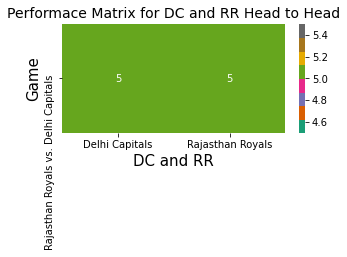

In [522]:
face_off = IPL_data_DR.groupby(['team1','team2','winner']).apply(lambda x:x['winner'].count()).reset_index(name='win_count')
face_off['Game'] = face_off['team1']+' vs. '+face_off['team2']
heatmap_face_off = pd.pivot_table(face_off, values='win_count', index=['Game'], columns='winner')

fig = plt.figure()
fig, ax = plt.subplots(1,1, figsize=(5,2))

g = sns.heatmap(heatmap_face_off, annot=True, cmap="Dark2", fmt='g')
ax.set_title('Performace Matrix for DC and RR Head to Head',size=14)
ax.set_xlabel('DC and RR',size=15)
ax.set_ylabel('Game',size=15)

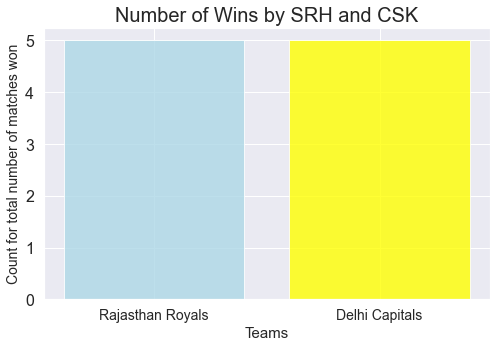

In [523]:
win_DR = pd.DataFrame(IPL_data_DR['winner'].value_counts())
win_DR['Team_name'] = win_DR.index
win_DR

color_ = ['LightBlue', 'Yellow']
sns.set(style='darkgrid')
fig=plt.gcf()
fig.set_size_inches(8,5)

plt.xticks(fontsize=14)
plt.yticks(fontsize=16)
plt.bar(win_DR['Team_name'], win_DR['winner'], color=color_, alpha=0.8)

    
plt.title('Number of Wins by SRH and CSK',fontsize=20)
plt.xlabel('Teams',fontsize=15)
plt.ylabel('Count for total number of matches won',fontsize=14)
plt.show()

In [531]:
IPL_data_DR = matches[(matches.team1 == "Delhi Capitals") | (matches.team2 == "Delhi Capitals")]
IPL_data_DR_v = IPL_data_DR[IPL_data_DR.venue == "Dubai International Cricket Stadium"]

In [532]:
IPL_data_DR_v

id  season city        date                  team1           team2  \
462  463    2014  NaN  2014-04-19  Kolkata Knight Riders  Delhi Capitals   
468  469    2014  NaN  2014-04-25    Sunrisers Hyderabad  Delhi Capitals   

               toss_winner toss_decision  result  dl_applied  \
462  Kolkata Knight Riders           bat  normal           0   
468    Sunrisers Hyderabad           bat  normal           0   

                  winner  win_by_runs  win_by_wickets player_of_match  \
462       Delhi Capitals            0               4       JP Duminy   
468  Sunrisers Hyderabad            4               0        AJ Finch   

                                   venue    umpire1      umpire2 umpire3  
462  Dubai International Cricket Stadium  Aleem Dar  VA Kulkarni     NaN  
468  Dubai International Cricket Stadium  M Erasmus       S Ravi     NaN

### Venuewise DC has 1 match at Dubai staduim out of 2 games

In [536]:
IPL_data_RR = matches[(matches.team1 == "Rajasthan Royals") | (matches.team2 == "Rajasthan Royals")]
IPL_data_RR_v = IPL_data_RR[IPL_data_RR.venue == "Dubai International Cricket Stadium"]
IPL_data_RR_v

id  season city        date                team1             team2  \
466  467    2014  NaN  2014-04-23  Chennai Super Kings  Rajasthan Royals   

          toss_winner toss_decision  result  dl_applied               winner  \
466  Rajasthan Royals         field  normal           0  Chennai Super Kings   

     win_by_runs  win_by_wickets player_of_match  \
466            7               0       RA Jadeja   

                                   venue          umpire1         umpire2  \
466  Dubai International Cricket Stadium  HDPK Dharmasena  RK Illingworth   

    umpire3  
466     NaN

#### Rajasthan Royals has lost a match played at this venue

## Efficiency of RR and DC Players

## Bowlers

In [544]:
# RR Bowlers
print("##############################################################################################################")

print("Economy Rates of RR Players")
print("##############################################################################################################")

IPL_bowler_stats_R = bowler_economy_rate[bowler_economy_rate.bowler.isin(bowler_RR_list)]
for name in bowler_RR_list:
    bowler_check1r = IPL_bowler_stats_R[IPL_bowler_stats_R.bowler==name]
    bowler_check1r.index = np.arange(1, len(bowler_check1r) + 1)
    print("\nAverage Bowling Economy Rate of ",name," in IPL so far ",bowler_check1r['Economy Rate'].mean(),"\n" )
print("##############################################################################################################")
 

print("\nEconomy Rates of DC Players")
print("##############################################################################################################")

bowler_DC_list = ['K Rabada', 'R Ashwin', 'HV Patel', 'AR Patel', "MP Stoinis"]
IPL_bowler_stats_DC = bowler_economy_rate[bowler_economy_rate.bowler.isin(bowler_DC_list)]
for name in bowler_DC_list:
    bowler_check1_ = IPL_bowler_stats_DC[IPL_bowler_stats_DC.bowler==name]
    bowler_check1_.index = np.arange(1, len(bowler_check1_) + 1)
    print("\nAverage Bowling Economy Rate of ",name," in IPL so far ",bowler_check1_['Economy Rate'].mean(),"\n" )
   

##############################################################################################################
Economy Rates of RR Players
##############################################################################################################

Average Bowling Economy Rate of  J Archer  in IPL so far  7.891050583657588 


Average Bowling Economy Rate of  S Gopal  in IPL so far  7.618887015177066 


Average Bowling Economy Rate of  JD Unadkat  in IPL so far  8.73718364698248 


Average Bowling Economy Rate of  BA Stokes  in IPL so far  8.458536585365852 

##############################################################################################################

Economy Rates of DC Players
##############################################################################################################

Average Bowling Economy Rate of  K Rabada  in IPL so far  8.281105990783411 


Average Bowling Economy Rate of  R Ashwin  in IPL so far  6.746021220159152 


Average Bowling Economy

## Batsmen

Rajasthan Royals

Average strike Rate of  JC Buttler  in powerplay is  136.03978162596525 

###############################################################################################################################

Average strike Rate of  SPD Smith  in powerplay is  124.47036392976513 

###############################################################################################################################

Average strike Rate of  SV Samson  in powerplay is  111.09847431666118 

###############################################################################################################################

Average strike Rate of  BA Stokes  in powerplay is  116.02798102606586 

###############################################################################################################################

Average strike Rate of  R Tewatia  in powerplay is  122.39596052096051 

####################################################################################################

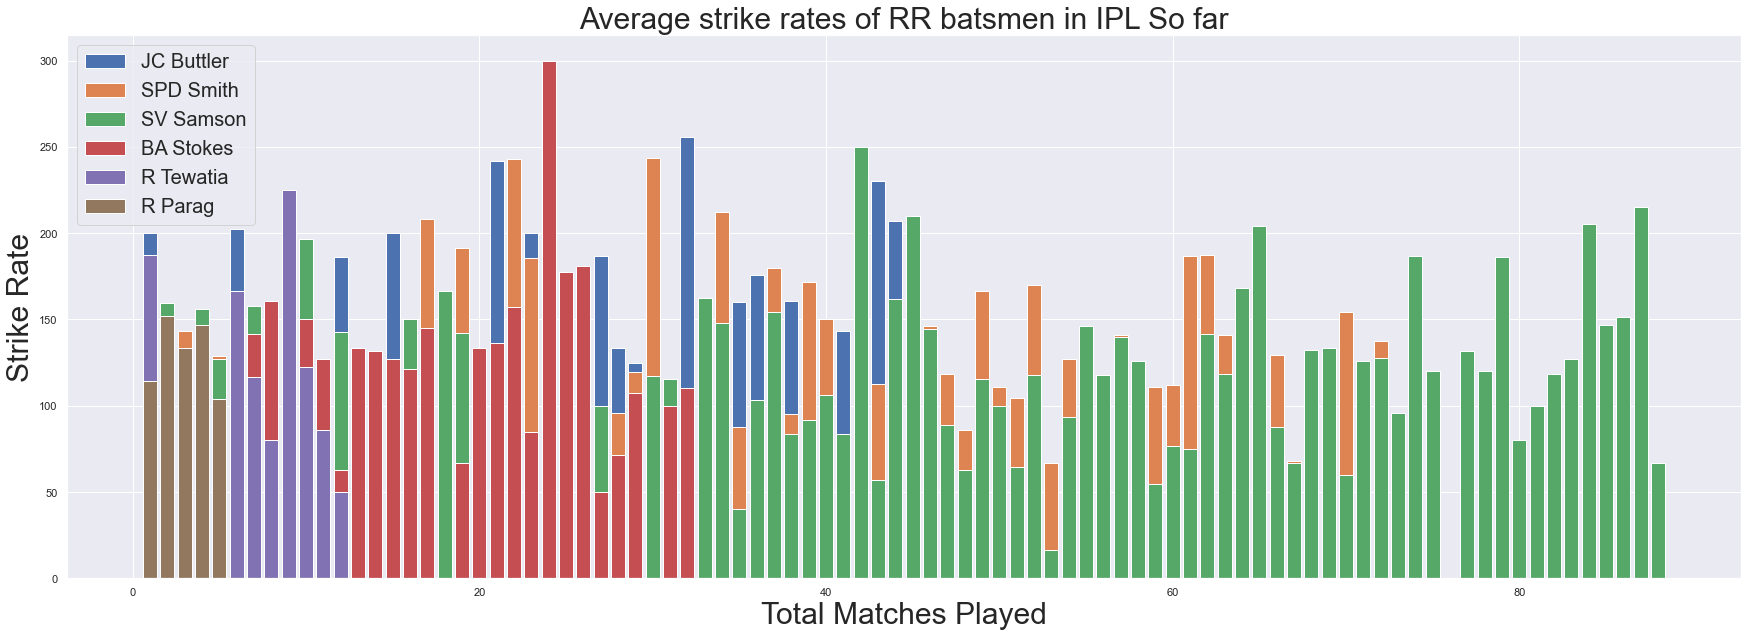

Delhi Capitals

Average strike Rate of  P Shaw  in IPL so far  126.44634614634614 

###############################################################################################################################

Average strike Rate of  S Dhawan  in IPL so far  110.24739841328773 

###############################################################################################################################

Average strike Rate of  AM Rahane  in IPL so far  101.82837732194324 

###############################################################################################################################

Average strike Rate of  SS Iyer  in IPL so far  104.61187984075868 

###############################################################################################################################

Average strike Rate of  MP Stoinis  in IPL so far  107.98461818061092 

######################################################################################################################

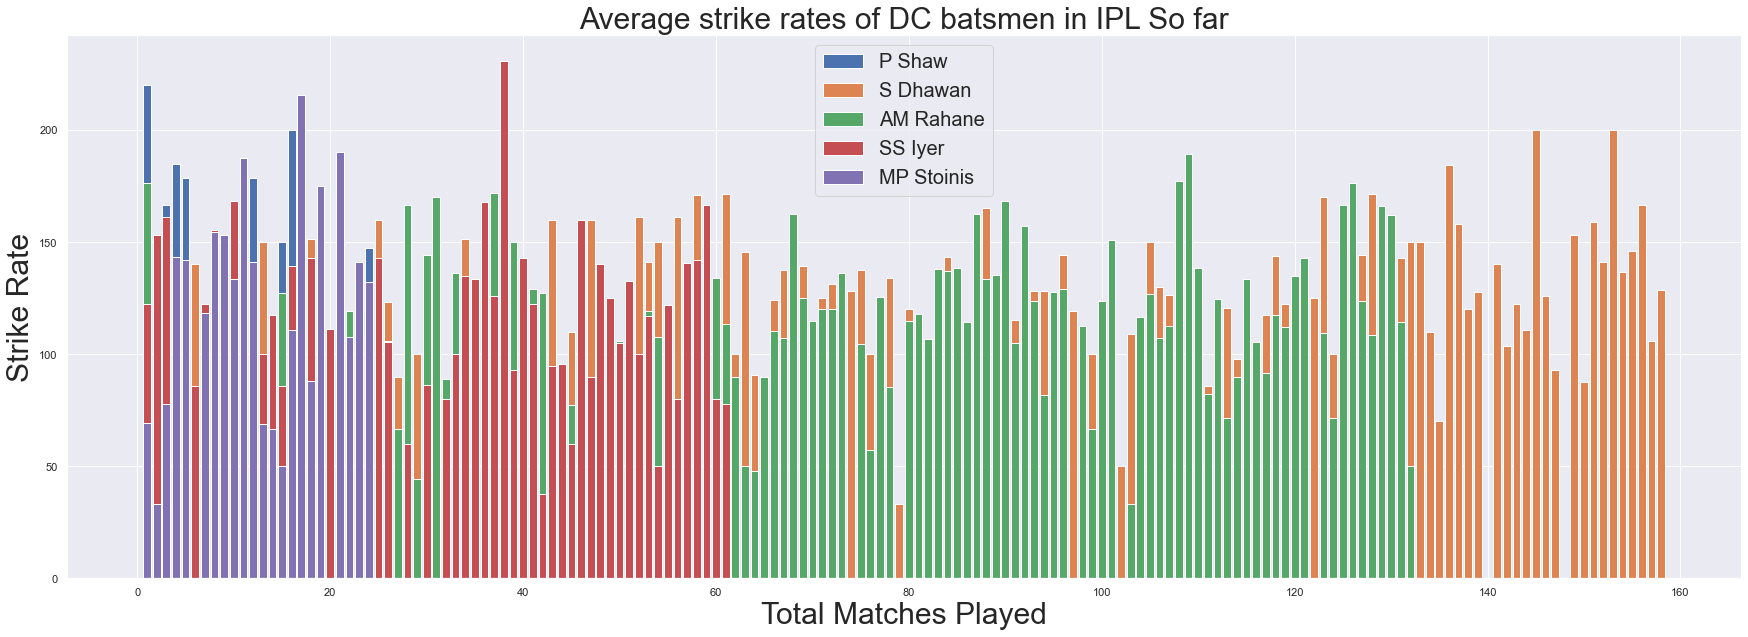

In [555]:
# RR batsmen
batsmen_RR_list = ['JC Buttler', 'SPD Smith', 'SV Samson', 'BA Stokes', 'R Tewatia', 'R Parag']

print("Rajasthan Royals")
batsman_R =  batsmen_performance_g[batsmen_performance_g.batsman.isin(batsmen_RR_list)]
plt.figure(figsize=(30,10))
for name in batsmen_RR_list:
    bowler_check_r = batsman_R[batsman_R.batsman==name]
    bowler_check_r.index = np.arange(1, len(bowler_check_r) + 1)
    print("\nAverage strike Rate of ",name," in powerplay is ",bowler_check_r['Strike Rate for Match'].mean(),"\n" )
    print("###############################################################################################################################")
    x=bowler_check_r.index
    y=bowler_check_r['Strike Rate for Match']
    plt.bar(x,y)
    

plt.legend(batsmen_RR_list,prop={'size':20})
plt.title("Average strike rates of RR batsmen in IPL So far" ,fontsize=30)
plt.xlabel("Total Matches Played",fontsize=30)
plt.ylabel("Strike Rate",fontsize=30)
plt.show()

# DC Batsmen
print("Delhi Capitals")
batsman_D =  batsmen_performance_g[batsmen_performance_g.batsman.isin(batsmen_DC_list)]
plt.figure(figsize=(30,10))
for name in batsmen_DC_list:
    bowler_check_d = batsman_D[batsman_D.batsman==name]
    bowler_check_d.index = np.arange(1, len(bowler_check_d) + 1)
    print("\nAverage strike Rate of ",name," in IPL so far ",bowler_check_d['Strike Rate for Match'].mean(),"\n" )
    print("###############################################################################################################################")
    x=bowler_check_d.index
    y=bowler_check_d['Strike Rate for Match']
    plt.bar(x,y)
    

plt.legend(batsmen_DC_list,prop={'size':20})
plt.title("Average strike rates of DC batsmen in IPL So far" ,fontsize=30)
plt.xlabel("Total Matches Played",fontsize=30)
plt.ylabel("Strike Rate",fontsize=30)
plt.show()

## Looking at the Venuewise details and Strike rate economy rates of players DC has added advantage over RR hence it might win

# Smith's Score

## In general Striking rate of SPD Smith in IPL so far is 124.47 according to above analysis
## Let's calculate Striking rate of SD smith against RR bowlers

In [572]:
IPL_data_S = IPL_data[IPL_data.batsman == "SPD Smith"]
IPL_data_SS =  IPL_data_S[IPL_data_S.bowler.isin(bowler_DC_list)]
IPL_data_SS.bowler.unique()


array(['AR Patel', 'MP Stoinis', 'R Ashwin', 'HV Patel', 'K Rabada'],
      dtype=object)


Average strike Rate of  SPD Smith  against DC bowlers is  104.47916666666667 

###############################################################################################################################


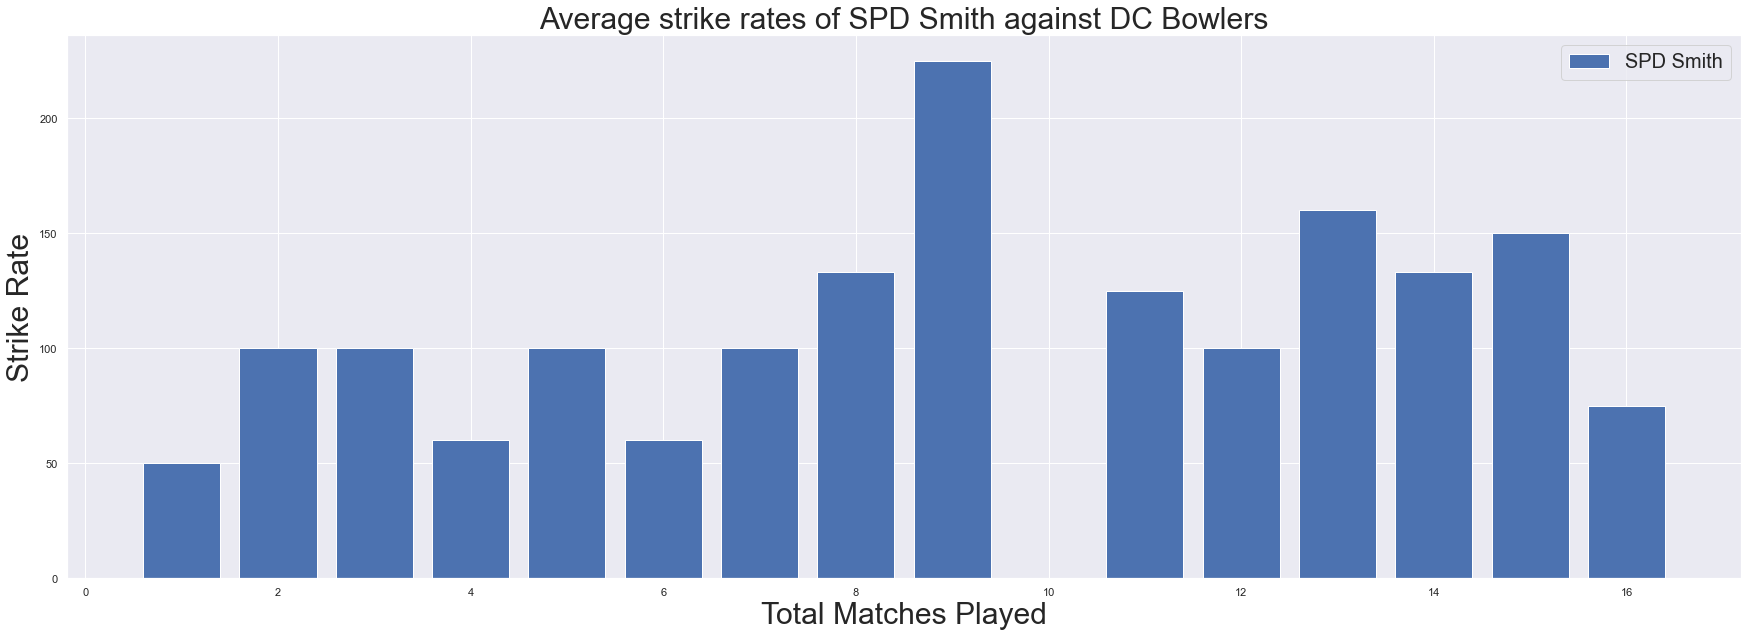

In [574]:
b_ings_g = IPL_data_SS.groupby(['match_id','batsman']).apply(lambda x:np.sum(x['batsman_runs'])).reset_index(name='Innings Runs')

b_ball_faced_g = IPL_data_SS.groupby(['match_id','batsman']).apply(lambda x:x['batsman_runs'].count()).reset_index(name='Balls Faced')
b_performance_g = pd.merge(b_ings_g,b_ball_faced_g,how='inner',left_on=['match_id','batsman'],right_on=['match_id','batsman'])
b_performance_g['Strike Rate for Match']=b_performance_g['Innings Runs']*100/b_performance_g['Balls Faced']

ss = ['SPD Smith']
batsman_SS =  b_performance_g[b_performance_g.batsman.isin(ss)]
plt.figure(figsize=(30,10))
for name in ss:
    bowler_check_ss = batsman_SS[batsman_SS.batsman==name]
    bowler_check_ss.index = np.arange(1, len(bowler_check_ss) + 1)
    print("\nAverage strike Rate of ",name," against DC bowlers is ",bowler_check_ss['Strike Rate for Match'].mean(),"\n" )
    print("###############################################################################################################################")
    x=bowler_check_ss.index
    y=bowler_check_ss['Strike Rate for Match']
    plt.bar(x,y)
    

plt.legend(ss,prop={'size':20})
plt.title("Average strike rates of SPD Smith against DC Bowlers" ,fontsize=30)
plt.xlabel("Total Matches Played",fontsize=30)
plt.ylabel("Strike Rate",fontsize=30)
plt.show()

In [624]:
b_ings_SS = IPL_data_S.groupby(['match_id','batsman']).apply(lambda x:np.sum(x['batsman_runs'])).reset_index(name='Innings Runs')
b_ball_faced_SS = IPL_data_S.groupby(['match_id','batsman']).apply(lambda x:x['batsman_runs'].count()).reset_index(name='Balls Faced')
b_performance_SS = pd.merge(b_ings_SS,b_ball_faced_SS,how='inner',left_on=['match_id','batsman'],right_on=['match_id','batsman'])
print("overall",b_performance_SS['Innings Runs'].describe())
print("With DC Bowlers",b_performance_g['Innings Runs'].describe())

overall count     72.000000
mean      28.430556
std       21.091235
min        1.000000
25%       13.000000
50%       24.500000
75%       39.000000
max      101.000000
Name: Innings Runs, dtype: float64
With DC Bowlers count    16.000000
mean      4.750000
std       3.022141
min       0.000000
25%       3.000000
50%       4.000000
75%       6.000000
max      12.000000
Name: Innings Runs, dtype: float64



### Smith might score around 0-15  runs today

## Wickets and wides during the match

In [629]:
b_DR = ['K Rabada', 'R Ashwin', 'HV Patel', 'AR Patel', 'MP Stoinis', 'J Archer', 'S Gopal', 'JD Unadkat', 'BA Stokes']

In [648]:
import plotly.express as px
import plotly.graph_objects as go
IPL_data_bowler_DR = IPL_data_bowler[IPL_data_bowler.bowler.isin(b_DR)]

bowling_wickets=IPL_data_bowler_DR[IPL_data_bowler_DR['dismissal_kind']!='run out']
bowling_tot=bowling_wickets.groupby('bowler').apply(lambda x:x['dismissal_kind'].dropna()).reset_index(name='Wickets')
bowling_wick_count=bowling_tot.groupby('bowler').count().reset_index()

bowling_top=bowling_wick_count.sort_values(by='Wickets',ascending=False)
top_bowlers=bowling_top.loc[:,['bowler','Wickets']][0:10] 

print("SRH Bowlers' Wicket count in IPL:\n",top_bowlers)
fig = px.bar(top_bowlers, x='bowler', y='Wickets',
             hover_data=['bowler'], color='Wickets',title='Wickets taken By SRH Bowlers in IPL')
fig.show()

SRH Bowlers' Wicket count in IPL:
        bowler  Wickets
7    R Ashwin      125
4  JD Unadkat       78
0    AR Patel       71
2    HV Patel       43
8     S Gopal       38
5    K Rabada       31
1   BA Stokes       26
3    J Archer       26
6  MP Stoinis       15


In [660]:
bowlers_list = ['K Rabada', 'R Ashwin', 'HV Patel', 'AR Patel', 'MP Stoinis', 'J Archer', 'S Gopal', 'JD Unadkat', 'BA Stokes']
bowling_wickets1 = IPL_data_bowler_DR[IPL_data_bowler_DR.bowler.isin(bowlers_list)]

bowling_tot1=bowling_wickets1.groupby('bowler').apply(lambda x:x['dismissal_kind'].dropna()).reset_index(name='Wickets')
bowling_wick_count1=bowling_tot1.groupby('bowler').count().reset_index()

bowling_wick_count1.median()/bowling_wick_count1.shape[0]


level_1    4.333333
Wickets    4.333333
dtype: float64

In [ ]:
# Around 8 -9 Wickets